In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from Adam import AdamOptim
from SGD import SGD
from utils import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score
from Logreg_old import LogisticRegression
from irls_optimizer import IRLS
from sklearn.preprocessing import LabelEncoder
np.seterr(divide = 'ignore') 
np.seterr(invalid='ignore')
np.seterr(over ='ignore')


{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'ignore'}

## NBA PLAYERS DATA ##

In [3]:
# data:
url = 'data/big/nba-players.csv'
dataframe = pd.read_csv(url)
dataframe.drop('name', axis=1, inplace=True)
dataframe.drop('Unnamed: 0', axis=1, inplace=True)
data = dataframe.values
dataframe.head()

X,y = data[:,:-1], data[:,-1]


Early stopping after epoch 11
accuracy : 0.6087203394895703
Early stopping after epoch 376
accuracy : 0.6518367577970228
Early stopping after epoch 10
accuracy : 0.6830880983423355
Early stopping after epoch 15
accuracy : 0.7062671128688773
accuracy : 0.6152270497951647


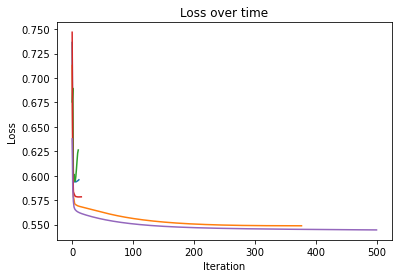

In [4]:
#ADAM
splitting_seeds = [42, 43, 44, 45, 46]
adam_accuracy = []
for seed in splitting_seeds:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
    logistic_regression_model = LogisticRegression(input_dim=X_train.shape[1])
    adam_optimizer = AdamOptim(eta=0.01)

    logistic_regression_model.train(X_train, y_train, optimizer=adam_optimizer, patience=5, epochs=500, batch_size=64)#, Xval=X_val, yval=y_val)
    y_pred = logistic_regression_model.predict(X_test)
    adam_accuracy.append(balanced_accuracy_score(y_test,y_pred.round()))
    print(f"accuracy : {balanced_accuracy_score(y_test,y_pred.round())}")
    logistic_regression_model.plot_loss()

Early stopping after epoch 16
accuracy : 0.6865698404159943
Early stopping after epoch 19
accuracy : 0.6456387615328012
Early stopping after epoch 21
accuracy : 0.6424225492022102
Early stopping after epoch 11
accuracy : 0.7261940979616672
Early stopping after epoch 13
accuracy : 0.6456349893254861


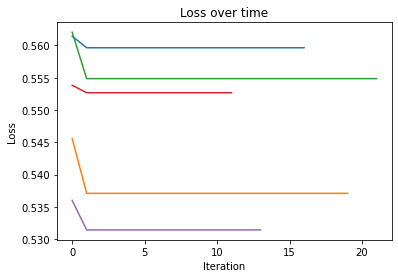

In [5]:
#IRLS
splitting_seeds = [42, 43, 44, 45, 46]
irls_accuracy = []
for seed in splitting_seeds:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
    logistic_regression_model = LogisticRegression(input_dim=X_train.shape[1])
    irls_optimizer = IRLS()

    logistic_regression_model.train(X_train, y_train, optimizer=irls_optimizer, patience=10, epochs=500, batch_size=32)
    y_pred = logistic_regression_model.predict(X_test)
    irls_accuracy.append(balanced_accuracy_score(y_test,y_pred.round()))
    print(f"accuracy : {balanced_accuracy_score(y_test,y_pred.round())}")
    logistic_regression_model.plot_loss()

In [8]:
#SGD
splitting_seeds = [42, 43, 44, 45, 46]
sgd_accuracy = []
for seed in splitting_seeds:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
    logistic_regression_model = LogisticRegression(input_dim=X_train.shape[1])
    sgd_optimizer = SGD(eta=0.001)

    logistic_regression_model.train(X_train, y_train, optimizer=sgd_optimizer, patience=10, epochs=500, batch_size=1)
    y_pred = logistic_regression_model.predict(X_test)
    sgd_accuracy.append(balanced_accuracy_score(y_test,y_pred.round()))
    print(f"accuracy : {balanced_accuracy_score(y_test,y_pred.round())}")

Early stopping after epoch 10
accuracy : 0.5
Early stopping after epoch 10
accuracy : 0.5
Early stopping after epoch 10
accuracy : 0.5
Early stopping after epoch 10
accuracy : 0.5
Early stopping after epoch 10
accuracy : 0.5


In [9]:
# Comparison Models
from utils import fitComparisonModels
splitting_seeds = [42, 43, 44, 45, 46]
comparison_accuracy = []
y_lda, y_qda, y_dt, y_rf = fitComparisonModels(X_train, y_train, X_test)
splitting_seeds = [42, 43, 44, 45, 46]
sgd_accuracy = []
for seed in splitting_seeds:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
    y_lda, y_qda, y_dt, y_rf = fitComparisonModels(X_train, y_train, X_test)
    sgd_accuracy.append((balanced_accuracy_score(y_test,y_lda), balanced_accuracy_score(y_test,y_qda), balanced_accuracy_score(y_test,y_dt), balanced_accuracy_score(y_test,y_rf)))
    print(F"lda: {balanced_accuracy_score(y_test,y_lda)}")
    print(f"qda: {balanced_accuracy_score(y_test,y_qda)}")
    print(f"dt: {balanced_accuracy_score(y_test,y_dt)}")
    print(f"rf: {balanced_accuracy_score(y_test,y_rf)}")

lda: 0.6785607554838324
qda: 0.7042316657701273
dt: 0.6028629490167952
rf: 0.6625425856195086
lda: 0.6446765155374428
qda: 0.6522895794418974
dt: 0.5605082922963718
rf: 0.648525499518877
lda: 0.664555783199851
qda: 0.6733718259141988
dt: 0.6246973365617433
rf: 0.6863785931582542
lda: 0.7238211134773349
qda: 0.6611499847885609
dt: 0.5997566169759658
rf: 0.6743839367204137
lda: 0.63017136922278
qda: 0.6717442732675553
dt: 0.5712018925624603
rf: 0.6379031792741331


## SMOKING DATA ##

In [2]:
url = "data/big/smoking.csv"
dataframe = pd.read_csv(url)
dataframe.drop('oral', axis=1, inplace=True)
data = dataframe.values

X, y = data[:,:-1], data[:,-1]
X[:,1] = LabelEncoder().fit_transform(X[:,1])
X[:,-1] = LabelEncoder().fit_transform(X[:,-1])

Early stopping after epoch 16
accuracy : 0.6189194201742141
Early stopping after epoch 17
accuracy : 0.6981088842319789
Early stopping after epoch 22
accuracy : 0.672524867715766
Early stopping after epoch 19
accuracy : 0.7264114677021603
Early stopping after epoch 15
accuracy : 0.5528672513092175


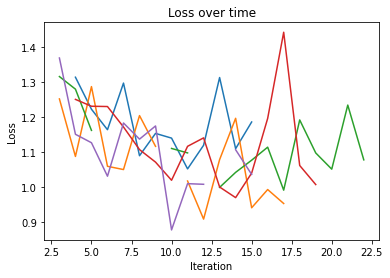

In [11]:
#ADAM
splitting_seeds = [42, 43, 44, 45, 46]
adam_accuracy = []
for seed in splitting_seeds:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
    y_train = y_train.astype('int')
    y_test = y_test.astype('int')
    logistic_regression_model = LogisticRegression(input_dim=X_train.shape[1])
    adam_optimizer = AdamOptim(eta=0.01)

    logistic_regression_model.train(X_train, y_train, optimizer=adam_optimizer, patience=5, epochs=500, batch_size=64)#, Xval=X_val, yval=y_val)
    y_pred = logistic_regression_model.predict(X_test)
    adam_accuracy.append(balanced_accuracy_score(y_test,y_pred.round()))
    print(f"accuracy : {balanced_accuracy_score(y_test,y_pred.round())}")
    logistic_regression_model.plot_loss()

In [3]:
#IRLS
splitting_seeds = [42, 43, 44, 45, 46]
irls_accuracy = []
for seed in splitting_seeds:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
    y_train = y_train.astype('int')
    y_test = y_test.astype('int')
    logistic_regression_model = LogisticRegression(input_dim=X_train.shape[1])
    irls_optimizer = IRLS()

    logistic_regression_model.train(X_train, y_train, optimizer=irls_optimizer, patience=10, epochs=500, batch_size=32)
    y_pred = logistic_regression_model.predict(X_test)
    irls_accuracy.append(balanced_accuracy_score(y_test,y_pred.round()))
    print(f"accuracy : {balanced_accuracy_score(y_test,y_pred.round())}")
    logistic_regression_model.plot_loss()

MemoryError: Unable to allocate 14.8 GiB for an array with shape (44553, 44553) and data type float64

Early stopping after epoch 10
accuracy : 0.5
Early stopping after epoch 10
accuracy : 0.5
Early stopping after epoch 10
accuracy : 0.5
Early stopping after epoch 10
accuracy : 0.5
Early stopping after epoch 10
accuracy : 0.5


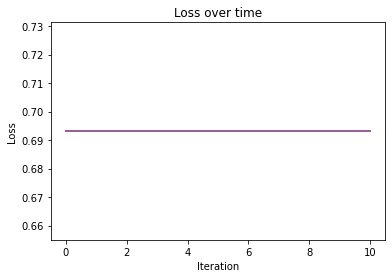

In [16]:
#SGD
splitting_seeds = [42, 43, 44, 45, 46]
sgd_accuracy = []
for seed in splitting_seeds:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
    y_train = y_train.astype('int')
    y_test = y_test.astype('int')
    logistic_regression_model = LogisticRegression(input_dim=X_train.shape[1])
    sgd_optimizer = SGD()

    logistic_regression_model.train(X_train, y_train, optimizer=sgd_optimizer, patience=10, epochs=500, batch_size=32)
    y_pred = logistic_regression_model.predict(X_test)
    sgd_accuracy.append(balanced_accuracy_score(y_test,y_pred.round()))
    print(f"accuracy : {balanced_accuracy_score(y_test,y_pred.round())}")
    logistic_regression_model.plot_loss()

In [ ]:
# Comparison Models
from utils import fitComparisonModels
splitting_seeds = [42, 43, 44, 45, 46]
comparison_accuracy = []
y_lda, y_qda, y_dt, y_rf = fitComparisonModels(X_train, y_train, X_test)
splitting_seeds = [42, 43, 44, 45, 46]
sgd_accuracy = []
for seed in splitting_seeds:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
    y_lda, y_qda, y_dt, y_rf = fitComparisonModels(X_train, y_train, X_test)
    sgd_accuracy.append((balanced_accuracy_score(y_test,y_lda), balanced_accuracy_score(y_test,y_qda), balanced_accuracy_score(y_test,y_dt), balanced_accuracy_score(y_test,y_rf)))
    print(F"lda: {balanced_accuracy_score(y_test,y_lda)}")
    print(f"qda: {balanced_accuracy_score(y_test,y_qda)}")
    print(f"dt: {balanced_accuracy_score(y_test,y_dt)}")
    print(f"rf: {balanced_accuracy_score(y_test,y_rf)}")

## BANANA DATA ##

In [9]:
from sklearn.impute import SimpleImputer
url = 'data/small/banana_quality.csv'
dataframe = pd.read_csv(url)
data = dataframe.values
dataframe.head()

X,y = data[:,:-1], data[:,-1]
y = LabelEncoder().fit_transform(y)


Early stopping after epoch 68
accuracy : 0.8773120463261308
Early stopping after epoch 67
accuracy : 0.8823064215394378
Early stopping after epoch 68
accuracy : 0.8843789216398725
Early stopping after epoch 68
accuracy : 0.8744747899159664
Early stopping after epoch 69
accuracy : 0.8794202939465088


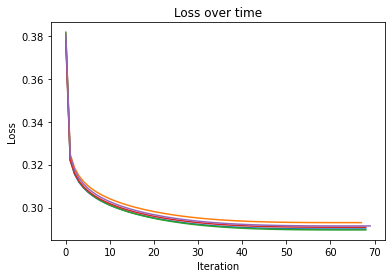

In [11]:
#ADAM
splitting_seeds = [42, 43, 44, 45, 46]
adam_accuracy = []
for seed in splitting_seeds:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
    logistic_regression_model = LogisticRegression(input_dim=X_train.shape[1])
    adam_optimizer = AdamOptim(eta=0.01)

    logistic_regression_model.train(X_train, y_train, optimizer=adam_optimizer, patience=5, epochs=500, batch_size=64)#, Xval=X_val, yval=y_val)
    y_pred = logistic_regression_model.predict(X_test)
    adam_accuracy.append(balanced_accuracy_score(y_test,y_pred.round()))
    print(f"accuracy : {balanced_accuracy_score(y_test,y_pred.round())}")
    logistic_regression_model.plot_loss()

In [12]:
#IRLS
splitting_seeds = [42, 43, 44, 45, 46]
irls_accuracy = []
for seed in splitting_seeds:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
    logistic_regression_model = LogisticRegression(input_dim=X_train.shape[1])
    irls_optimizer = IRLS()

    logistic_regression_model.train(X_train, y_train, optimizer=irls_optimizer, patience=10, epochs=500, batch_size=32)
    y_pred = logistic_regression_model.predict(X_test)
    irls_accuracy.append(balanced_accuracy_score(y_test,y_pred.round()))
    print(f"accuracy : {balanced_accuracy_score(y_test,y_pred.round())}")
    logistic_regression_model.plot_loss()

TypeError: loop of ufunc does not support argument 0 of type float which has no callable exp method

Early stopping after epoch 10
accuracy : 0.5
Early stopping after epoch 10
accuracy : 0.5
Early stopping after epoch 10
accuracy : 0.5
Early stopping after epoch 10
accuracy : 0.5
Early stopping after epoch 10
accuracy : 0.5


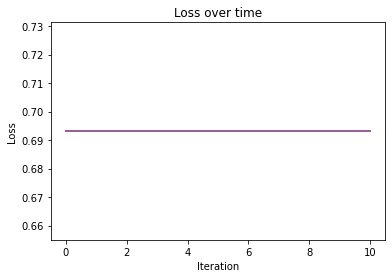

In [13]:
#SGD
splitting_seeds = [42, 43, 44, 45, 46]
sgd_accuracy = []
for seed in splitting_seeds:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
    logistic_regression_model = LogisticRegression(input_dim=X_train.shape[1])
    sgd_optimizer = SGD()

    logistic_regression_model.train(X_train, y_train, optimizer=sgd_optimizer, patience=10, epochs=500, batch_size=32)
    y_pred = logistic_regression_model.predict(X_test)
    sgd_accuracy.append(balanced_accuracy_score(y_test,y_pred.round()))
    print(f"accuracy : {balanced_accuracy_score(y_test,y_pred.round())}")
    logistic_regression_model.plot_loss()

In [ ]:
# Comparison Models
from utils import fitComparisonModels
splitting_seeds = [42, 43, 44, 45, 46]
comparison_accuracy = []
y_lda, y_qda, y_dt, y_rf = fitComparisonModels(X_train, y_train, X_test)
splitting_seeds = [42, 43, 44, 45, 46]
sgd_accuracy = []
for seed in splitting_seeds:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
    y_lda, y_qda, y_dt, y_rf = fitComparisonModels(X_train, y_train, X_test)
    sgd_accuracy.append((balanced_accuracy_score(y_test,y_lda), balanced_accuracy_score(y_test,y_qda), balanced_accuracy_score(y_test,y_dt), balanced_accuracy_score(y_test,y_rf)))
    print(F"lda: {balanced_accuracy_score(y_test,y_lda)}")
    print(f"qda: {balanced_accuracy_score(y_test,y_qda)}")
    print(f"dt: {balanced_accuracy_score(y_test,y_dt)}")
    print(f"rf: {balanced_accuracy_score(y_test,y_rf)}")

### with interactions ###

In [17]:
from utils import createFeatureInteractions
X_int = createFeatureInteractions(X)
print(len(X[0]),len(X_int[0]))

7 28


Early stopping after epoch 28
accuracy : 0.9600368332762699
Early stopping after epoch 28
accuracy : 0.9612600827405986
Early stopping after epoch 28
accuracy : 0.9537240634557471
Early stopping after epoch 31
accuracy : 0.9498549419767908
Early stopping after epoch 30
accuracy : 0.9470717488578244


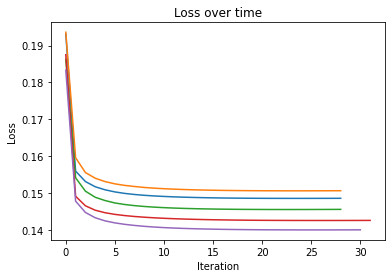

In [20]:
#ADAM
splitting_seeds = [42, 43, 44, 45, 46]
adam_accuracy = []
for seed in splitting_seeds:
    X_train, X_test, y_train, y_test = train_test_split(X_int, y, test_size=0.2, random_state=seed)
    logistic_regression_model = LogisticRegression(input_dim=X_train.shape[1])
    adam_optimizer = AdamOptim(eta=0.01)

    logistic_regression_model.train(X_train, y_train, optimizer=adam_optimizer, patience=5, epochs=500, batch_size=64)#, Xval=X_val, yval=y_val)
    y_pred = logistic_regression_model.predict(X_test)
    adam_accuracy.append(balanced_accuracy_score(y_test,y_pred.round()))
    print(f"accuracy : {balanced_accuracy_score(y_test,y_pred.round())}")
    logistic_regression_model.plot_loss()

In [19]:
#SGD
splitting_seeds = [42, 43, 44, 45, 46]
sgd_accuracy = []
for seed in splitting_seeds:
    X_train, X_test, y_train, y_test = train_test_split(X_int, y, test_size=0.2, random_state=seed)
    logistic_regression_model = LogisticRegression(input_dim=X_train.shape[1])
    sgd_optimizer = SGD(eta=0.001)

    logistic_regression_model.train(X_train, y_train, optimizer=sgd_optimizer, patience=5, epochs=500, batch_size=1)
    y_pred = logistic_regression_model.predict(X_test)
    sgd_accuracy.append(balanced_accuracy_score(y_test,y_pred.round()))
    print(f"accuracy : {balanced_accuracy_score(y_test,y_pred.round())}")

Early stopping after epoch 5
accuracy : 0.5
Early stopping after epoch 5
accuracy : 0.5
Early stopping after epoch 5
accuracy : 0.5
Early stopping after epoch 5
accuracy : 0.5
Early stopping after epoch 5
accuracy : 0.5


In [21]:
#IRLS
splitting_seeds = [42, 43, 44, 45, 46]
irls_accuracy = []
for seed in splitting_seeds:
    X_train, X_test, y_train, y_test = train_test_split(X_int, y, test_size=0.2, random_state=seed)
    logistic_regression_model = LogisticRegression(input_dim=X_train.shape[1])
    irls_optimizer = IRLS()

    logistic_regression_model.train(X_train, y_train, optimizer=irls_optimizer, patience=10, epochs=500, batch_size=32)
    y_pred = logistic_regression_model.predict(X_test)
    irls_accuracy.append(balanced_accuracy_score(y_test,y_pred.round()))
    print(f"accuracy : {balanced_accuracy_score(y_test,y_pred.round())}")
    logistic_regression_model.plot_loss()

TypeError: loop of ufunc does not support argument 0 of type float which has no callable exp method

In [ ]:
# Comparison Models
from utils import fitComparisonModels
splitting_seeds = [42, 43, 44, 45, 46]
comparison_accuracy = []
y_lda, y_qda, y_dt, y_rf = fitComparisonModels(X_train, y_train, X_test)
splitting_seeds = [42, 43, 44, 45, 46]
sgd_accuracy = []
for seed in splitting_seeds:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
    y_lda, y_qda, y_dt, y_rf = fitComparisonModels(X_train, y_train, X_test)
    sgd_accuracy.append((balanced_accuracy_score(y_test,y_lda), balanced_accuracy_score(y_test,y_qda), balanced_accuracy_score(y_test,y_dt), balanced_accuracy_score(y_test,y_rf)))
    print(F"lda: {balanced_accuracy_score(y_test,y_lda)}")
    print(f"qda: {balanced_accuracy_score(y_test,y_qda)}")
    print(f"dt: {balanced_accuracy_score(y_test,y_dt)}")
    print(f"rf: {balanced_accuracy_score(y_test,y_rf)}")